In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from skimpy import skim, generate_test_data
from summarytools import dfSummary
import pygwalker as pyg
import sidetable
import datetime
sns.set_style("whitegrid")

In [2]:
col_info_link =r"https://gist.githubusercontent.com/cmg777/979285c2bcde9832dd9cc0ee0fe9062d/raw/c4befc87572a744a7cd66b54ac233412a5f4ec2f/DataDefinitions.csv"
data_set_link=r"https://gist.githubusercontent.com/cmg777/788a6c962f2d8f217ca44ff5dc567b5c/raw/ad1e0fd5b086eab7d90f5ba126c7839d4940f2e1/GeoDS4Bolivia.geojson"

In [3]:
var_info=pd.read_csv(col_info_link)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_columns",None) 
var_info

,Variable,Label
0,poly_id,Polygon ID
1,asdf_id,ASDF ID
2,mun,Municipality
3,mun_id,Municipality ID
4,dep,Department
5,dep_id,Department ID
6,dep_mun,Department-municipality
7,shapeID,Municipality Geoquery Polygon ID
8,imds,Municipal Sustainable Development Index
9,rank_imds,Bolivia Index Ranking


In [4]:
gdf = gpd.read_file(data_set_link)
gdf.head(3)

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry
0,0,Esmeralda,-68.086369,-18.945744,178,Esmeralda,40505,Oruro,5,Oruro-Esmeralda,BOL-ADM3-33444609B20338026,53.200001,108,2854,0,NaN,78.300003,0.10,10.800000,19.200001,20.6,47.099998,0.0,43.200001,28.700001,34.700001,0,0,0,0,0,14,0,0,11.8,97.800003,40,53.599998,1,1,0.6,0.6,95.500000,15,0,82.400002,2,37,0.1,NaN,68.500000,43.900002,14.7,26.200001,0,0,1,0,NaN,52,0.4,0.28,NaN,8.100000,44.099998,87.699997,552.5,2,0.1,0,0,0,0,82.900002,86.699997,10.7,1082,34.759998,55.080002,85.690002,68.860001,58.529999,34.540001,52.230000,30.920000,24.530001,83.940002,32.560001,77.379997,50,82.400002,26.889999,962.03308,1051.7993,1148.5365,1242.4298,1364.5643,1486.7859,1625.0844,1772.2502,1946.8031,2044.5874,2275.4063,2564.9146,2820.8704,3077.3789,3359.6067,3707.0911,4065.6479,4454.5977,4886.9614,5354.1050,11.729473,12.111817,10.962022,11.699198,13.085610,13.647187,13.667681,13.595437,13.489282,11.414175,11.726494,12.039332,12.354541,12.671274,12.987050,13.300419,13.611585,13.921671,400.66104,402.31870,404.97272,406.84192,408.98264,410.99747,400.56021,402.63989,404.73074,406.83206,408.94409,411.06708,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,1,Santuario de Quillacas,-66.813557,-19.318918,169,Quillacas,40202,Oruro,5,Oruro-Quillacas,BOL-ADM3-33444609B53994240,50.500000,171,4474,0,88.300003,73.599998,0.15,19.299999,31.500000,19.5,7.700000,87.0,41.000000,48.599998,64.599998,0,0,0,23,0,55,1,0,12.1,94.800003,33,25.000000,2,0,1.2,0.9,60.500000,25,0,64.599998,27,49,0.2,18.1,78.699997,67.400002,6.8,14.700000,0,0,2,3,18.200001,45,2.8,0.35,30,16.700001,22.400000,77.199997,0.0,2,0.2,0,0,0,0,53.700001,90.099998,0.0,443,27.950001,34.820000,70.199997,57.730000,87.529999,21.840000,50.110001,56.599998,46.639999,74.089996,30.680000,75.440002,50,69.720001,4.380000,3312.91750,3382.0591,3447.3469,3509.0361,3575.7029,3654.4546,3723.5171,3791.8071,3862.3999,3931.6042,4008.8794,4093.4082,4171.9414,4262.7119,4357.5601,4434.0586,4517.6450,4591.6426,4682.3174,4778.1196,12.965525,13.142761,13.074501,13.143079,12.948340,13.821883,13.822321,13.803769,14.016370,12.862933,12.999367,13.136051,13.273612,13.412519,13.552914,13.693778,13.834767,13.975857,398.69547,402.18451,404.49866,406.64880,408.32587,410.74161,399.42441,401.71268,404.01230,406.32236,408.64389,410.97791,"MULTIPOLYGON (((-66.50208 -19.35990, -66.56355..."
2,2,Pampa Aullagas,-67.165981,-19.231799,185,Pampa Aullagas,40802,Oruro,5,Oruro-Pampa Aullagas,BOL-ADM

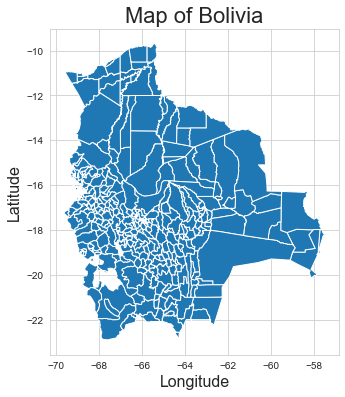

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("Map of Bolivia", fontsize=22)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
gdf.plot(ax = ax)
plt.show()

In [6]:
health_df = gdf[["shapeName","imds","rank_imds","COORD_X","COORD_Y","sdg2_2_cmc","sdg2_2_oww","sdg3_3_cdir","sdg3_3_di","sdg3_3_imr","sdg3_3_ti","sdg3_3_hivi","sdg3_7_afr"]]
health_df.head()

,shapeName,imds,rank_imds,COORD_X,COORD_Y,sdg2_2_cmc,sdg2_2_oww,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr
0,Esmeralda,53.200001,108,-68.086369,-18.945744,19.200001,20.6,0,0,0,0,0,14
1,Santuario de Quillacas,50.500000,171,-66.813557,-19.318918,31.500000,19.5,0,0,0,23,0,55
2,Pampa Aullagas,47.299999,246,-67.165981,-19.231799,31.500000,19.5,0,0,0,34,0,55
3,Llallagua,58.099998,44,-66.572717,-18.362740,18.000000,18.9,0,0,0,68,47,54
4,Caripuyo,43.500000,299,-66.592666,-18.180206,29.500000,18.0,0,0,0,11,0,85


In [7]:
health_df.to_csv("healthcare_data.csv",index = False)

In [8]:
health_df1 = pd.read_csv("healthcare_data.csv")
health_df1.head()

,shapeName,imds,rank_imds,COORD_X,COORD_Y,sdg2_2_cmc,sdg2_2_oww,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr
0,Esmeralda,53.200001,108,-68.086369,-18.945744,19.200001,20.6,0,0,0,0,0,14
1,Santuario de Quillacas,50.500000,171,-66.813557,-19.318918,31.500000,19.5,0,0,0,23,0,55
2,Pampa Aullagas,47.299999,246,-67.165981,-19.231799,31.500000,19.5,0,0,0,34,0,55
3,Llallagua,58.099998,44,-66.572717,-18.362740,18.000000,18.9,0,0,0,68,47,54
4,Caripuyo,43.500000,299,-66.592666,-18.180206,29.500000,18.0,0,0,0,11,0,85


In [9]:
health_df1.shapeName.nunique()

328

<p>The variables have the following understanding:</p>

In [10]:
dfSummary(health_df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,shapeName[object],1. San Pedro2. Santa Rosa3. Totora4. San Ramón5. San Lorenzo6. El Puente7. San Javier8. San Ignacio9. Entre Ríos10. Bolpebra11. other,3 (0.9%)3 (0.9%)2 (0.6%)2 (0.6%)2 (0.6%)2 (0.6%)2 (0.6%)2 (0.6%)2 (0.6%)1 (0.3%)318 (93.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACOElEQVR4nO3boW3DUBhG0Wcr0NQqKG/nyQSZLRN0n/KCBJunC6RSa+Je6RwY9KQr/SBfMj0ej0HTfPQD2E+8MPHCxAsTL0y8MPHCpnVdz2OMcb/fP45+DH9zWpbl5ehHsI+zGSZemHhh4oWJFyZemHhh4oWJFyZe2GnbttvRj2CfyQ+QupzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MJNQmEkozNkMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2QwzCYWZhMKczTDxwsQLEy9MvDDxwsQLEy9MvDDxwsQLs+eF2fPCnM0we16YPS/M2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w+Zpmt6PfgT7zGOMt6MfwT7OZph4YeKFiRcmXph4YeKFiRcmXph4YfMY4/PoR7CPSSjM2Qyb1nU9+7PJ/7Zt2+3Zv7hOy7K8XC6XryMexe9cr9fXZ587m2HihYkXJl6YeGHihYkXJl6YeGHihfluM+Cn7zZNQmHOZph4YeKFiRcmXph4Yd/jz4KWeHxiUgAAAABJRU5ErkJggg=="">",0(0.0%)
2,imds[float64],Mean (sd) : 51.1 (6.8)min < med < max:35.7 < 50.5 < 80.2IQR (CV) : 7.9 (7.5),188 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABN0lEQVR4nO3asW2DQBhA4XMUiebS4sIdCzgLZIhMQOu1mCBTpQg1DRISngCHk+CM772vpjjpyb/8w53meQ4q39uzD6A83p99gEfquv6OMZ7XPDsMw1/f9z97n+lVHTp0jPHctu3vmme7rrvsfZ5X5uiGMDSEoSEMDWFoCENDZF+vUnbjaZquIYRV65Ueyx46cTf+2vs8FI5uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQh74cmGIcx8+maW5rniXeGC0mdFVVH94YXebohjA0hKEhDA1haAhDQxgaYpM92iu8x7dJaK/wHp+jG8LQEMW8605B/ACCDE38AOLohjA0hKEhDA2x+GfMt11lWQzt266yINerFKXs3Ib+Ryk7t6E3lPLrDyHvBDD0hlJ+/SHknQCuVxB3VxdoSZkuTekAAAAASUVORK5CYII="">",0(0.0%)
3,rank_imds[int64],Mean (sd) : 170.0 (98.0)min < med < max:1.0 < 170.0 < 339.0IQR (CV) : 169.0 (1.7),339 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABD0lEQVR4nO3VsW2DYBBA4SSKBMW5xUWaiAU8QSZI5QluL7p/AnfZIHu4cRFqetxHQcKSMY7f+0o4nX54SDyP4/ikx/ey9gF0G69TN5qm2UfEds6SYRjeI+K48uxP3/eHObP38GxL7v7rXUyGjohtZp7mLC6lfGTm95qzXdd9tm07K15d17vM/Lr2GS6ZXXJ3KeXt97XJ0P9NVVWbSz7Mpc9zb/xHQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0xBkWaliktOtbDQAAAABJRU5ErkJggg=="">",0(0.0%)
4,COORD_X[float64],Mean (sd) : -66.1 (2.2)min < med < max:-69.5 < -66.2 < -57.7IQR (CV) : 3.3 (-30.7),339 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABWUlEQVR4nO3csU3EMBSH8QdCSvNocwUN8gKwwE1AxQRumSldJmAK9qChILWbSJFyC3CHn853oPy/X20lkT7FjmUpN+u6Grbv9q8fANdx1+Iifd+/uvuuZmwp5XuapvcW90W9JqHdfZdz/qoZO47jQ4t7IoapWwShRTSZuiPmeX5OKb3VjC2lPLr7Z+VY1v4TjoaOfGAty/JkZlVrdNd194H1fJ9z/qgcy9p/wtHQwQ+sfbtHwiWwRosgtAhCiyC0CEKLuPo++lKC+3O5PfdmQgf353J7bqZuEYQWQWgRhBZBaBGEFkFoEYQWQWgRhBZBaBGEFkFoEYQWsZljygjFs2vJ0Ipn10zdIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtQvKYMmIrZ9eE/sV/Obs+98e6hG4o8vabxWaAc3+sS+iGIm+/mdkwDC8ppeZ/Z/zJAflTffcBrMZwAAAAAElFTkSuQmCC"">",0(0.0%)
5,COORD_Y[float64],Mean (sd) : -17.4 (2.4)min < med < max:-22.7 < -17.6 < -10.1IQR (CV) : 2.4 (-7.4),339 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABVklEQVR4nO3cMa6CQBRG4dG8hG

In [11]:
skim(health_df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 339    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ imds                │     0 │        0 │       51 │    6.8 │     36 │     47 │     55 │      80 │  ▂█▇▂▁   │  │
│ │ rank_imds           │     0 │        0 │      170 │     98 │      1 │     86 │    250 │     340 │  ██████  │  │
│ │ COORD_X             │     0 │        0 │      -66 │    2.2 │    -69 │    -68 │    -65 │     -58 │   ▇█▆▂   │  │
│ │ COORD_Y             │     0 │        0 │      -17 │    2.4 │    -23 │    -19 │    -16 │     -10 │  ▁▄█▃▁▁  │  │
│ │ sdg2_2_cmc          │     0 │        0 │       24 │     12 │    7.6 │     14 │     30 │      53 │  █▄▇▃▃▂  │  │
│ │ sdg2_2_oww          │     0 │        0 │       22 │    6.5 │     11 │     17 │     27 │      34 │  ▆▄█▅▂▆  │  │
│ │ sdg3_3_cdir         │     0 │        0 │     0.96 │    3.8 │      0 │      0 │      0 │      49 │    █     │  │
│ │ sdg3_3_di           │     0 │        0 │     0.71 │    6.8 │      0 │      0 │      0 │     120 │    █     │  │
│ │ sdg3_3_imr          │     0 │        0 │      1.5 │    8.4 │      0 │      0 │      0 │      84 │    █     │  │
│ │ sdg3_3_ti           │     0 │        0 │       38 │     46 │      0 │    5.5 │     55 │     360 │    █▂    │  │
│ │ sdg3_3_hivi         │     0 │        0 │       41 │     94 │      0 │      0 │     35 │     690 │    █     │  │
│ │ sdg3_7_afr          │     0 │        0 │       75 │     37 │      0 │     52 │     93 │     330 │   ▄█▁    │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ shapeName                 │       0 │          0 │                          1.5 │                      500 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [12]:
health_df1.shapeName.nunique()

328

Text(0.5, 0, '% of malnutrition')

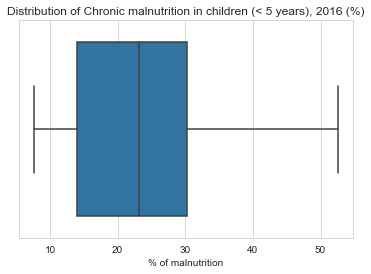

In [13]:
sns.boxplot(data=health_df1, x="sdg2_2_cmc")
plt.title("Distribution of Chronic malnutrition in children (< 5 years), 2016 (%)")
plt.xlabel("% of malnutrition")

Text(0.5, 0, 'Obesity %')

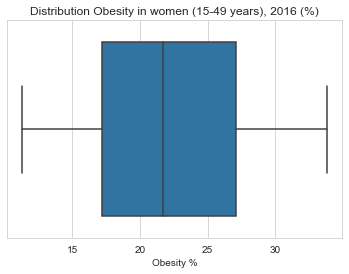

In [14]:
sns.boxplot(data=health_df1, x="sdg2_2_oww")
plt.title("Distribution Obesity in women (15-49 years), 2016 (%)")
plt.xlabel("Obesity %")

Text(0.5, 0, 'Household %')

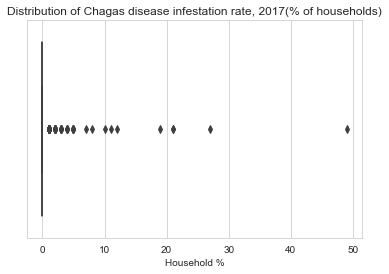

In [15]:
sns.boxplot(data=health_df1, x="sdg3_3_cdir")
plt.title("Distribution of Chagas disease infestation rate, 2017(% of households)")
plt.xlabel("Household %")

Text(0.5, 0, 'Household %')

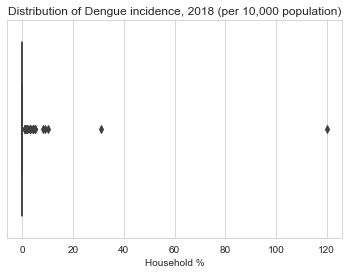

In [16]:
sns.boxplot(data=health_df1, x="sdg3_3_di")
plt.title("Distribution of Dengue incidence, 2018 (per 10,000 population)")
plt.xlabel("Household %")

Text(0.5, 0, 'Average cases of Maleria')

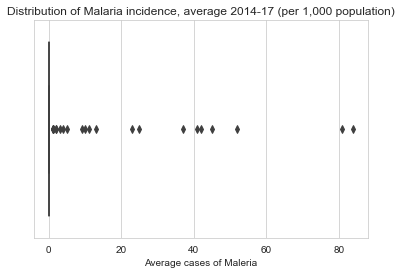

In [17]:
sns.boxplot(data=health_df1, x="sdg3_3_imr")
plt.title("Distribution of Malaria incidence, average 2014-17 (per 1,000 population)")
plt.xlabel("Average cases of Maleria")

Text(0.5, 0, 'Tuberclosis cases')

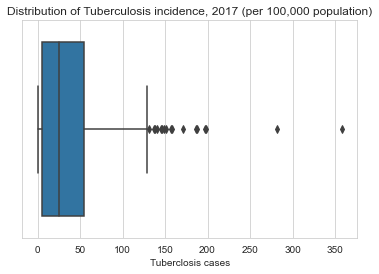

In [18]:
sns.boxplot(data=health_df1, x="sdg3_3_ti")
plt.title("Distribution of Tuberculosis incidence, 2017 (per 100,000 population)")
plt.xlabel("Tuberclosis cases")

Text(0.5, 0, 'Average cases of HIV')

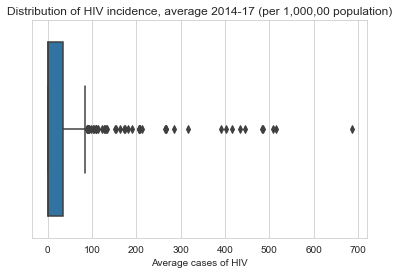

In [19]:
sns.boxplot(data=health_df1, x="sdg3_3_hivi")
plt.title("Distribution of HIV incidence, average 2014-17 (per 1,000,00 population)")
plt.xlabel("Average cases of HIV")

Text(0.5, 0, 'Fertility rate/1000 women')

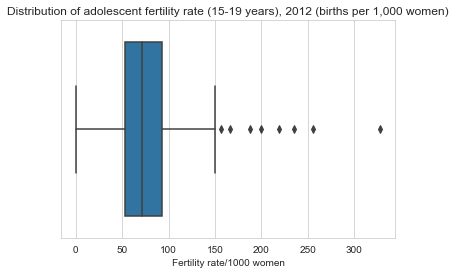

In [20]:
sns.boxplot(data=health_df1, x="sdg3_7_afr")
plt.title("Distribution of adolescent fertility rate (15-19 years), 2012 (births per 1,000 women)")
plt.xlabel("Fertility rate/1000 women")

<AxesSubplot:>

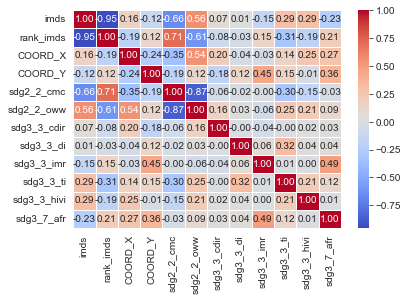

In [21]:
corr_matrix = health_df1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [22]:
alt.Chart(health_df1).mark_circle(size=60).encode(
    x = alt.X('sdg3_3_di',axis=alt.Axis(title = "Municipal Sustainable Development Index")),
    y = alt.Y('imds',axis = alt.Axis(title = 'Chagas disease infestation rate, 2017 (% of households)')),
    color = alt.Color('sdg2_2_cmc',scale = alt.Scale(scheme = 'set2'),
                     legend = alt.Legend(title="Chronic malnutrition in children (< 5 years), 2016 (%)"))
).properties(title="Dev Index vs. Chagas Infestation rate").interactive()

alt.Chart(...)

In [31]:
alt.Chart(health_df1).mark_circle(size=60).encode(
    x = alt.X('rank_imds',axis = alt.Axis(title = 'Bolivia Index Ranking')),
    y = alt.Y('sdg3_7_afr', axis = alt.Axis(title = 'Adolesence fertility rate')),
    color = alt.Color('sdg3_3_imr',scale = alt.Scale(scheme = 'set2'),
                     legend = alt.Legend(title="Malaria cases")),
    tooltip = ['rank_imds:Q','shapeName:O','sdg3_3_imr:Q']
).properties(title="Ranking of cities vs. Adolescence fertility rate").interactive()

alt.Chart(...)

In [32]:
alt.Chart(health_df1).mark_circle(size=60).encode(
    x = alt.X('rank_imds',axis = alt.Axis(title = 'Bolivia Index Ranking')),
    y = alt.Y('sdg3_3_di', axis = alt.Axis(title = 'Dengue incidence, 2018 (per 10,000 population)')),
    color = alt.Color('sdg3_3_imr',scale = alt.Scale(scheme = 'set2'),
                     legend = alt.Legend(title="Malaria cases")),
    tooltip = ['rank_imds:Q','shapeName:O','sdg3_3_imr:Q']
).properties(title="Ranking of cities vs. Dengue instances").interactive()

alt.Chart(...)

| Variable Name | Meaning |
| :-- | :-: |
|<b>imds</b>|Municipal Sustainable Development Index|
|<b>rank_imds</b>|Bolivia Index Ranking|
|<b>sdg2_2_cmc</b>|Chronic malnutrition in children (< 5 years), 2016 (%)|
|<b>sdg2_2_oww</b>|Obesity in women (15-49 years), 2016 (%)|
|<b>sdg3_3_cdir</b>|Chagas disease infestation rate, 2017 (% of households)|
|<b>sdg3_3_di</b>|Dengue incidence, 2018 (per 10,000 population)|
|<b>sdg3_3_imr</b>|Malaria incidence, average 2014-17 (per 1,000 population)|
|<b>sdg3_3_ti</b>|Tuberculosis incidence, 2017 (per 100,000 population)|
|<b>sdg3_3_hivi</b>|HIV incidence, average 2014-17 (per 1,000,00 population)|
|<b>sdg3_7_afr</b>|Adolescent fertility rate (15-19 years), 2012 (births per 1,000 women)|